# BP神经网络

根据课堂所学原理，补全BP神经网络核心运算代码

并在本文件中实现功能，实现以下功能：

1. 根据BP神经网络原理，实现简单的三层神经网络(64, 100, 10)；
2. 用该网络实现手写数字的识别；
3. 自己拍摄一张手写数字，将其展示在文件中并进行识别。

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelBinarizer# 标签二值化
from sklearn.model_selection import train_test_split # 切割数据

### 1. 根据BP神经网络原理，实现简单的三层神经网络(64, 100, 10)

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
 
def dsigmoid(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [4]:
############################# To do #############################
class NeuralNetwork:
    def __init__(self, layers):  # (64,100,10) # 初始化网络
        self.weights = [np.random.randn(y, x) for x, y in zip(layers[:-1], layers[1:])] # zip两个（64，100）（100，10）矩阵
        self.biases = [np.random.randn(y, 1) for y in layers[1:]]
        
    def update_weights(self, x, y, lr):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        # 前向传播
        x = np.reshape(x, (x.shape[0], 1))
        y = np.reshape(y, (y.shape[0], 1))
        activation = x
        activations = [x]  # 列表存储所有激活值，层与层之间
        zs = []  # 列表存储所有的z向量，层与层之间的
        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)

        # 反向传播
        delta = (activations[-1] - y) * (activations[-1] * (1 - activations[-1]))  # 使用已计算的激活值
        nabla_b[-1] = delta
        nabla_w[-1] = np.outer(delta, activations[-2])

        for l in range(2, len(self.weights) + 1):
            z = zs[-l]
            sp = activations[-l] * (1 - activations[-l])  # 同样使用已计算的激活值
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.outer(delta, activations[-l - 1])

        # 更新权重和偏置
        self.weights = [w - (lr / x.shape[1]) * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (lr / x.shape[1]) * nb for b, nb in zip(self.biases, nabla_b)]
        
        
    def train(self, x_data, y_data, lr=0.015, epochs=10000):
        accuracy = []  # 用来保存测试过程中的准确率
        loss = []  # 用来保存测试时产生的代价函数的值

        for n in range(epochs + 1):
            # 对于每个训练样本更新权重
            for x, y in zip(x_data, y_data):
                self.update_weights(x, y, lr)

            # 每训练100次预测，输出一次预测准确率
            if n % 100 == 0 and n != 0:
                print(n)
                predictions = []
                for j in range(X_test.shape[0]):
                    # 获取预测结果：返回与十个标签值逼近的距离，数值最大的选为本次的预测值
                    output = self.predict(X_test[j])
                    # 将最大的数值所对应的标签返回
                    predictions.append(np.argmax(output))  # 获取预测结果
                acc = np.mean(np.equal(predictions, y_test))
                accuracy.append(acc)
                cost = np.mean(np.square(y_test - predictions) / 2)
                loss.append(cost)
                # np.equal()：相同返回true，不同返回false

        return accuracy, loss
        
    def predict(self, x):
        # Convert input array into 2D array if it's not already
        if x.ndim == 1:
            x = np.reshape(x, (len(x), 1))
            # Forward pass
        activation = x
        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, activation) + b
            activation = sigmoid(z)
        layer2 = activation
        # 计算输出层得到的结果
        return layer2

### 2. 实现手写数字识别

In [5]:
digits = load_digits()# 载入数据
X = digits.data# 数据
y = digits.target# 标签

# 数据归一化
X -= X.min()
X /= X.max()

In [6]:
# 网络初始化
nn = NeuralNetwork([64, 100, 10])

# 将数据数据集分为X_train,X_test,y_train,y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 
# 数据处理,标签二值化
label_binarizer = LabelBinarizer()
labels_train = label_binarizer.fit_transform(y_train)
labels_test = label_binarizer.transform(y_test)

# 训练,需要十几分钟
epoch = 8000
accuracy, loss = nn.train(X_train, labels_train, epochs=epoch)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000


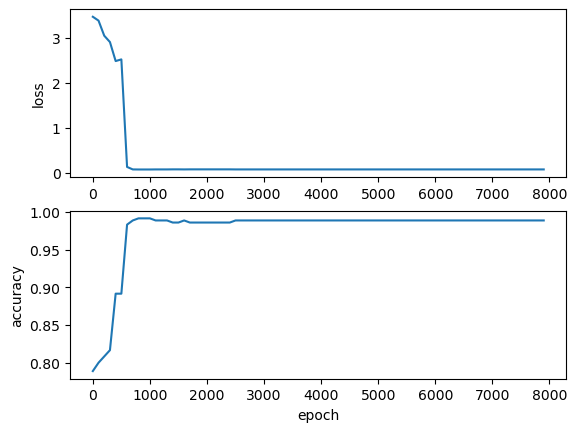

In [7]:
# 训练结果可视化
plt.subplot(2, 1, 1)
plt.plot(range(0, epoch, int(epoch/len(loss))), loss)
plt.ylabel('loss')
plt.subplot(2, 1, 2)
plt.plot(range(0, epoch, int(epoch/(len(accuracy)))), accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### 3. 拍摄手写数字并使用训练好的模型进行预测

识别的数字为： 7


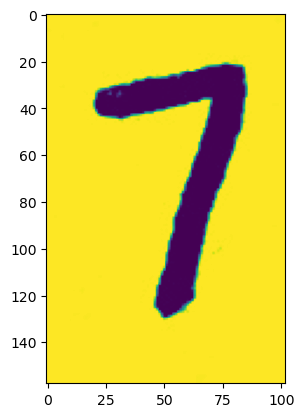

In [16]:
import cv2
def predict_num(img, nn):
    # 将图像大小调整为8x8像素
    img_resized = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA)
    # 反转颜色（因为原始数据集是白底黑字）
    img_inverted = 255 - img_resized
    
    # 将像素值归一化到0和1之间
    img_normalized = img_inverted / 255.0
    # 将图像展平为64个特征的一维数组
    img_flattened = img_normalized.flatten()
    # 使用训练好的神经网络预测数字
    prediction = nn.predict(img_flattened)
    # 返回概率最高的索引，对应预测的数字
    return np.argmax(prediction)


img = cv2.imread('D:/PyCharm Community Edition 2024.1/Project/for_class/computer_learning/7.jpg', 0)  # 将引号中的图像名改为你命名的图像
plt.imshow(img)
# img = img.astype(np.float64)
print("识别的数字为：", predict_num(img, nn))

## 提交方式

将以下两个文件打包为压缩包
1. 在ipynb或py文件中实现以上代码
2. 你自己拍摄的手写数字图片



文件命名方式/邮件主题：BP_学号_姓名

文件放至邮件附件中提交至：d202180247@hust.edu.cn

截止时间：5.18晚 23：59